In [ ]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rishavdash/retail-demand-forecasting-dataset

Dataset URL: https://www.kaggle.com/datasets/rishavdash/retail-demand-forecasting-dataset
License(s): ODbL-1.0
retail-demand-forecasting-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset='/content/retail-demand-forecasting-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("Retail_Dataset2.csv")

In [ ]:
df.head(5)

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [ ]:
# predicting Order_Demand for given product code based on
# StateHoliday, Open, Day_Type, SchoolHoliday

In [ ]:
df.isnull().sum()

,0
Product_id,0
Product_Code,0
Warehouse,0
Product_Category,0
Date,0
Order_Demand,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
df["Date"]=pd.to_datetime(df["Date"]) #, format='%d/%m/%Y'

In [ ]:
df.head(5)

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95


In [ ]:
# df1 = pd.get_dummies(df, columns=['Product_Code', 'Warehouse', 'Product_Category'], drop_first=True)


In [ ]:
# df1.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df2=df.copy()
label_encoders = {}
for column in ['Product_Code', 'Warehouse', 'Product_Category']:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column])
    label_encoders[column] = le

use df2

In [ ]:
df2.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,32,3,2,2016-01-03,16000,1,0,0,0,91
1,786743,1772,3,3,2016-01-03,50000,1,0,0,0,85
2,786967,543,3,26,2016-01-03,3000,1,0,0,0,85
3,786856,548,3,26,2016-01-03,1000,1,0,0,0,93
4,899538,1791,0,15,2016-01-03,7,1,0,0,0,95


In [ ]:
unique_classes = {}
for column in ['Product_Code', 'Warehouse', 'Product_Category']:
    unique_classes[column] = df[column].nunique()

# Print the number of unique classes for each column
for column, count in unique_classes.items():
    print(f"{column}: {count} unique classes")

Product_Code: 2117 unique classes
Warehouse: 4 unique classes
Product_Category: 30 unique classes


In [ ]:
#1 weekend, 0 weekday
df2['Day_Type'] = df['Date'].dt.dayofweek.apply(lambda x: '1' if x >= 5 else '0')

In [ ]:
state_holiday_mapping = {'0': 0, 'a': 1, 'b': 2}
df2['StateHoliday'] = df2['StateHoliday'].map(state_holiday_mapping)
df2['Day_Type'] = df2['Day_Type'].astype(int)

In [ ]:
df2.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,Day_Type
0,786725,32,3,2,2016-01-03,16000,1,0,0,0,91,1
1,786743,1772,3,3,2016-01-03,50000,1,0,0,0,85,1
2,786967,543,3,26,2016-01-03,3000,1,0,0,0,85,1
3,786856,548,3,26,2016-01-03,1000,1,0,0,0,93,1
4,899538,1791,0,15,2016-01-03,7,1,0,0,0,95,1


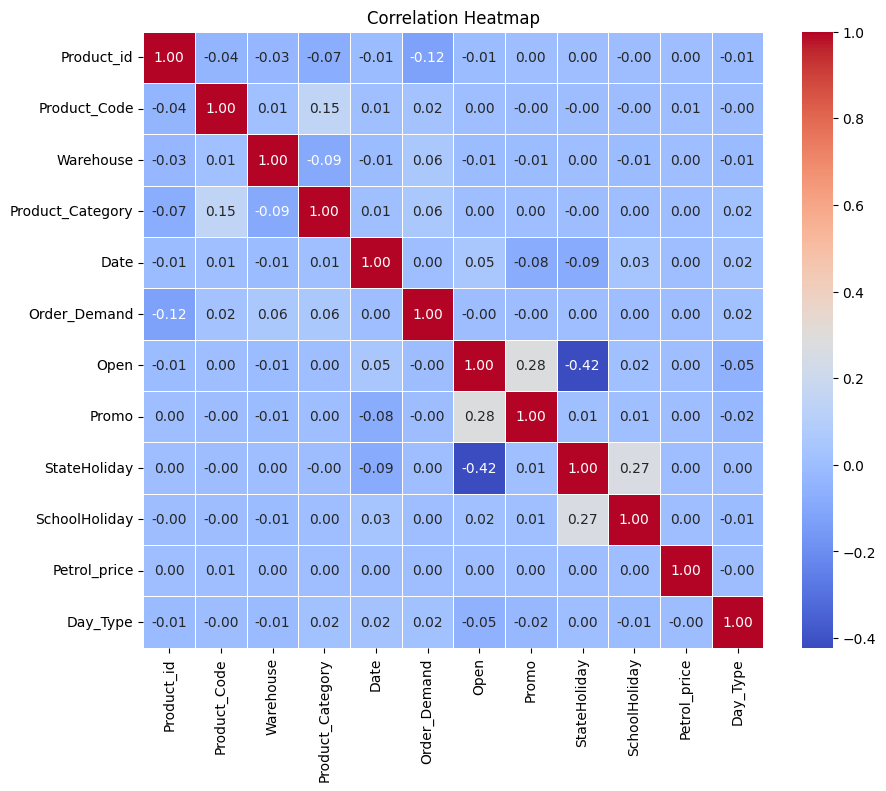

In [ ]:
corr = df2.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

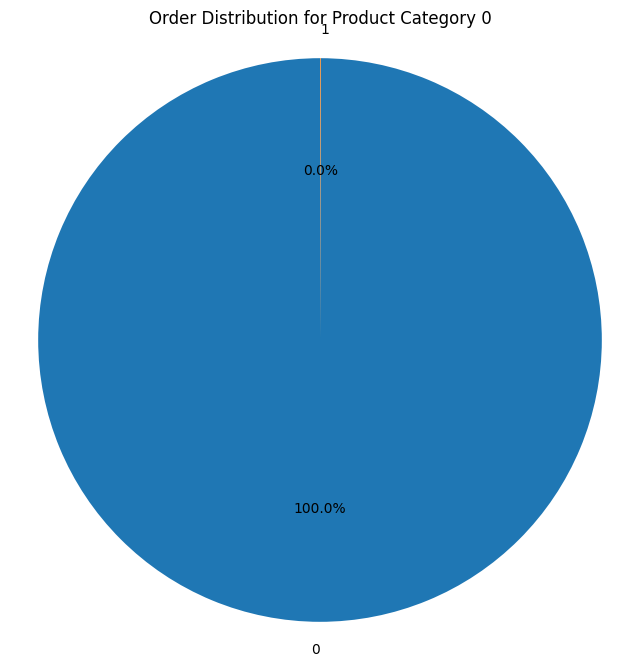

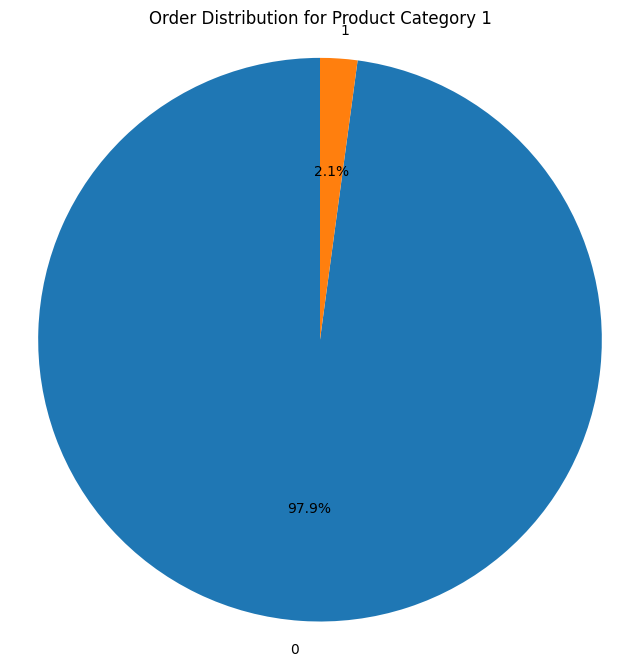

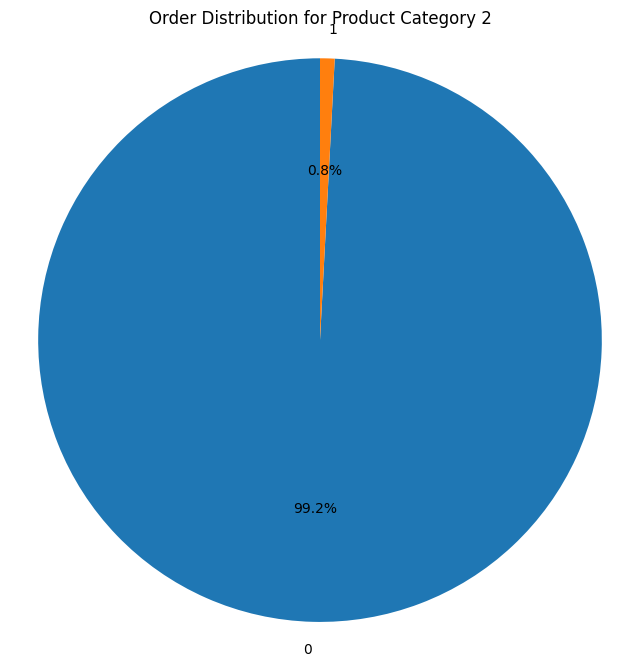

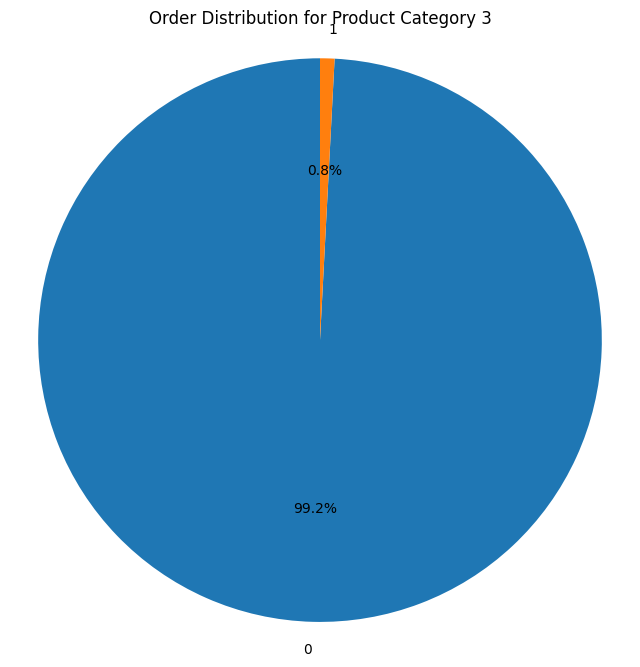

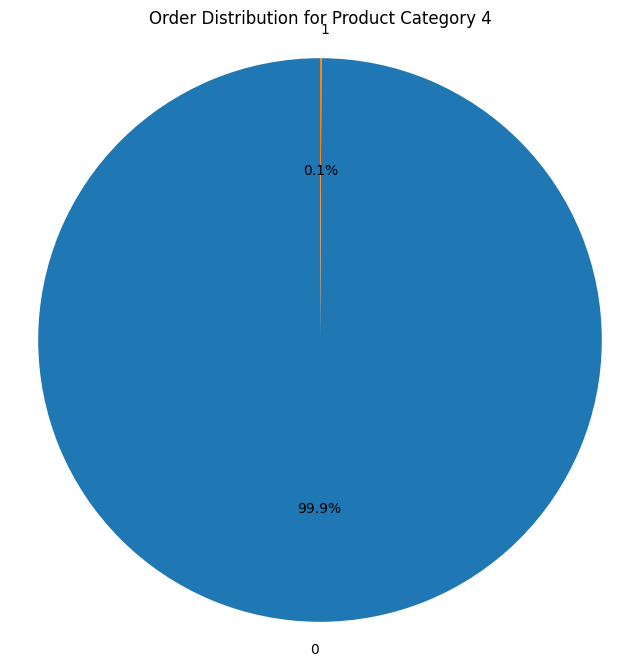

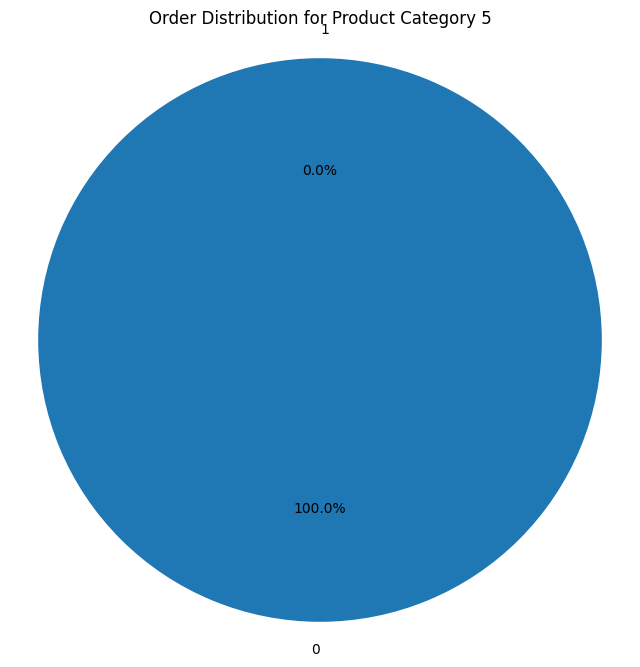

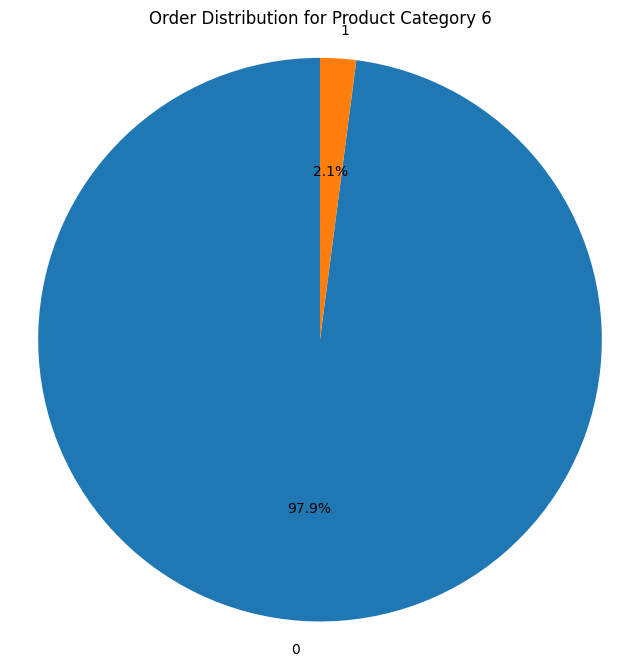

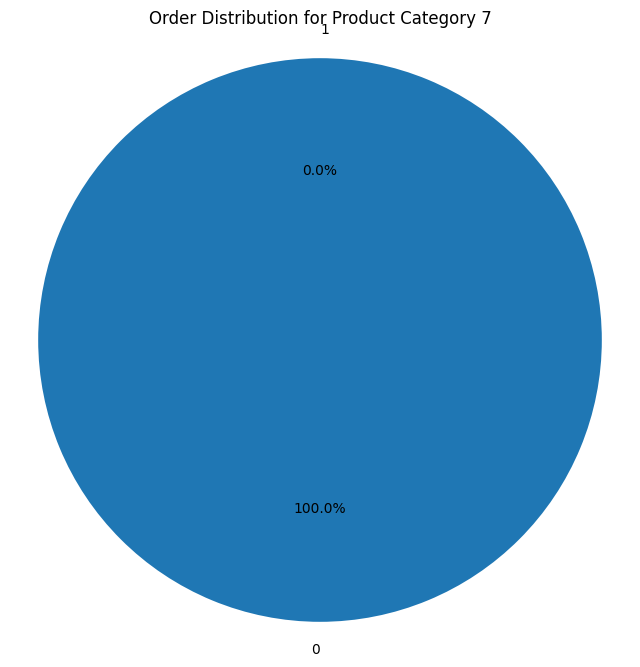

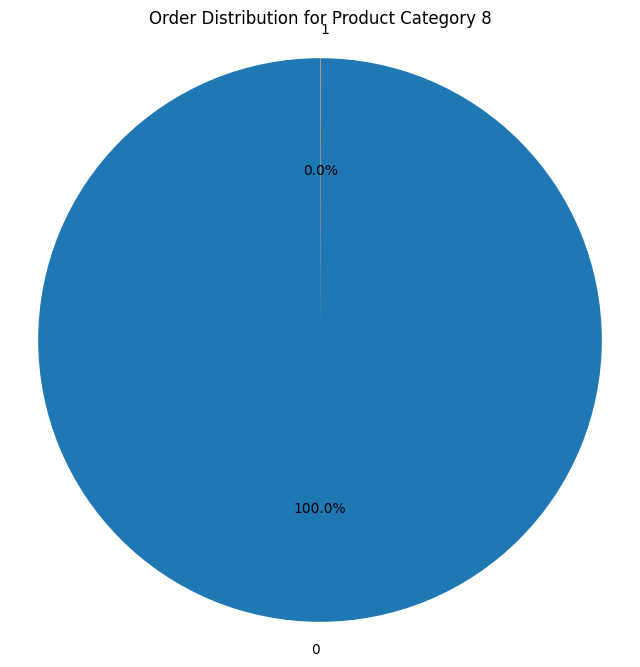

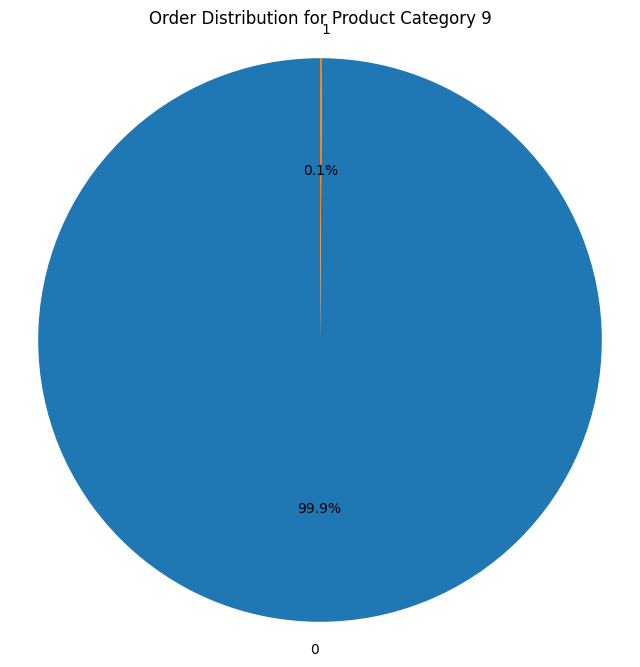

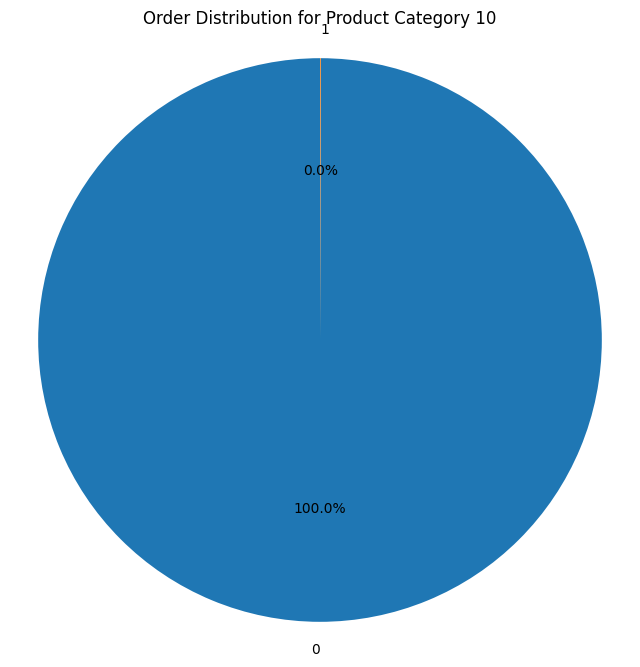

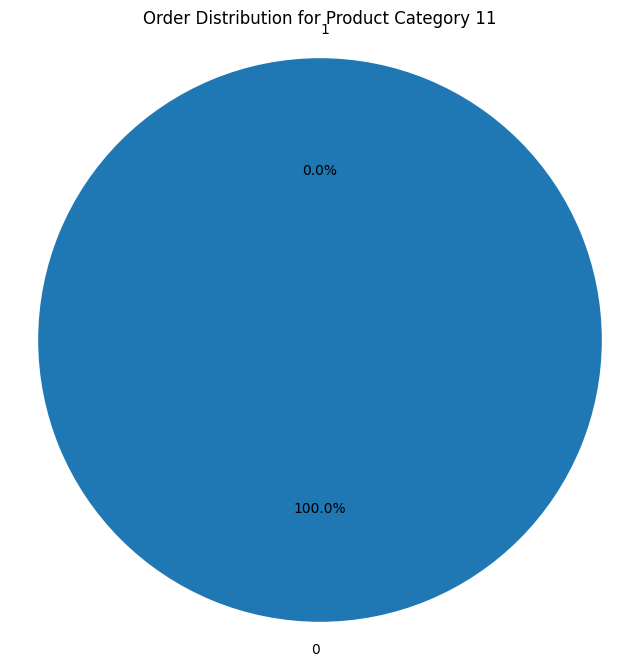

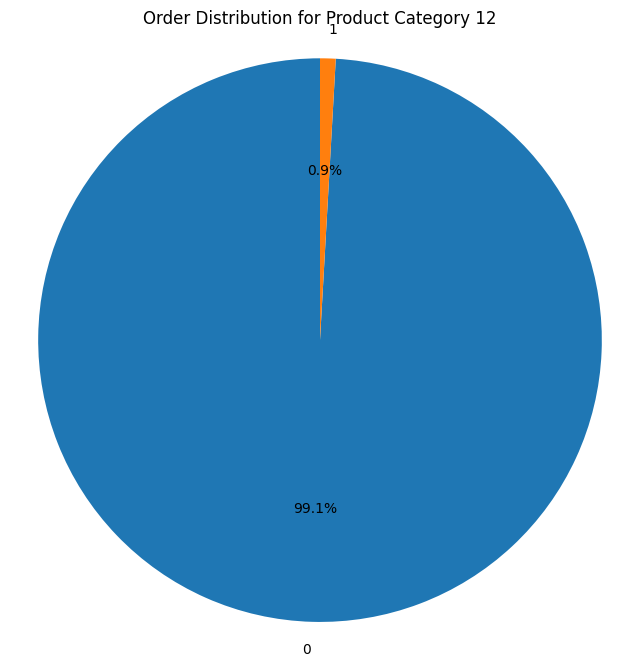

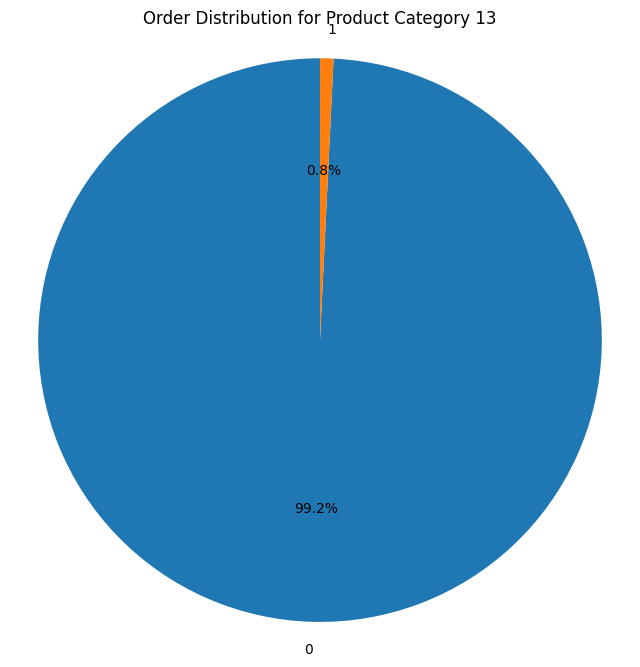

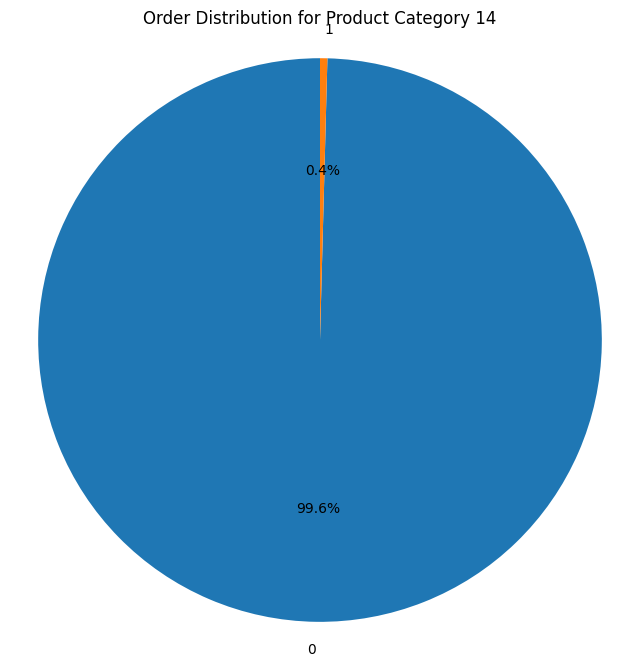

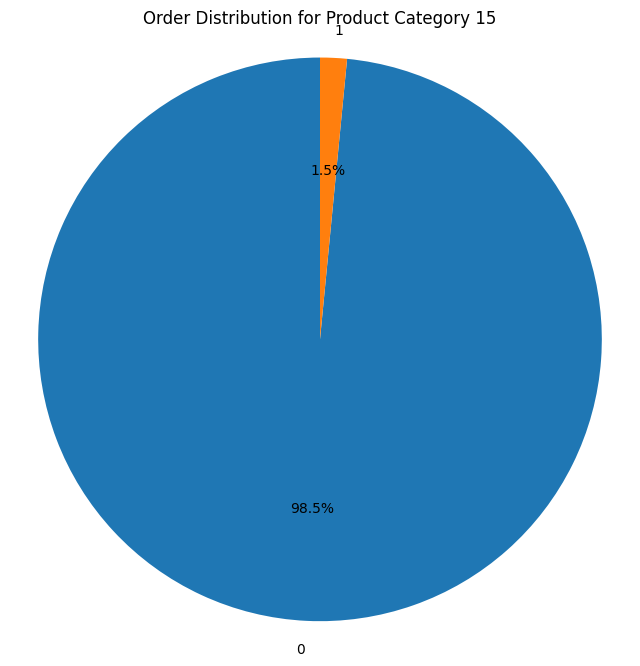

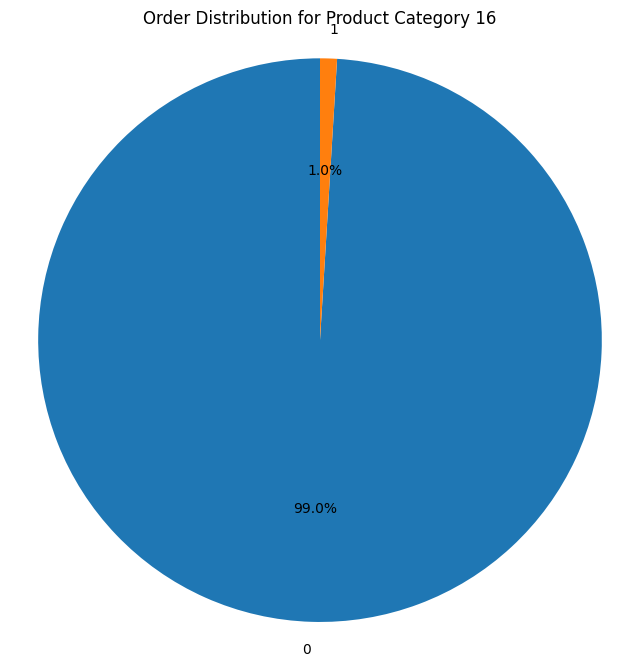

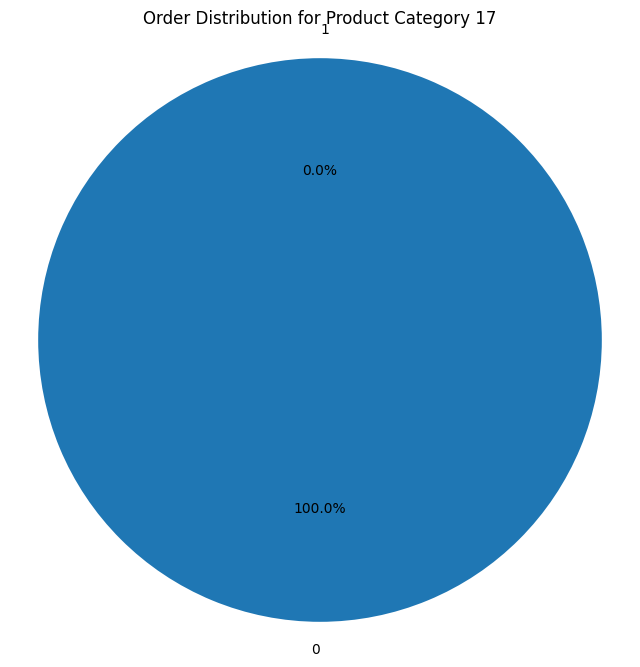

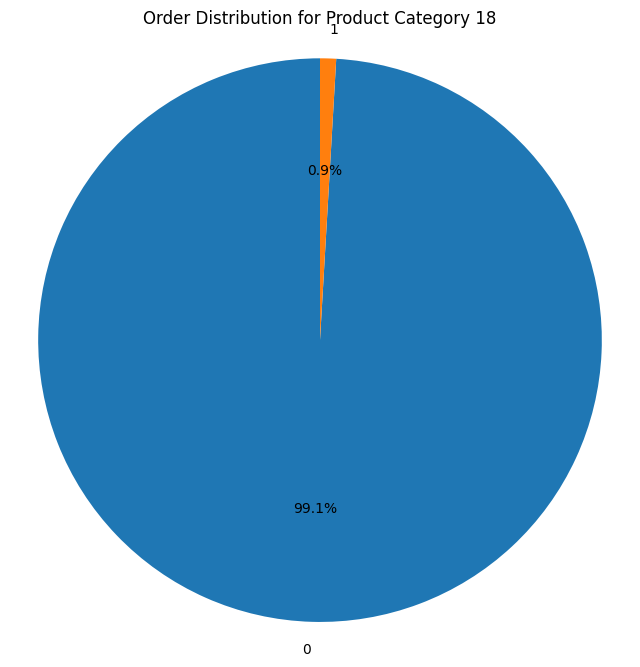

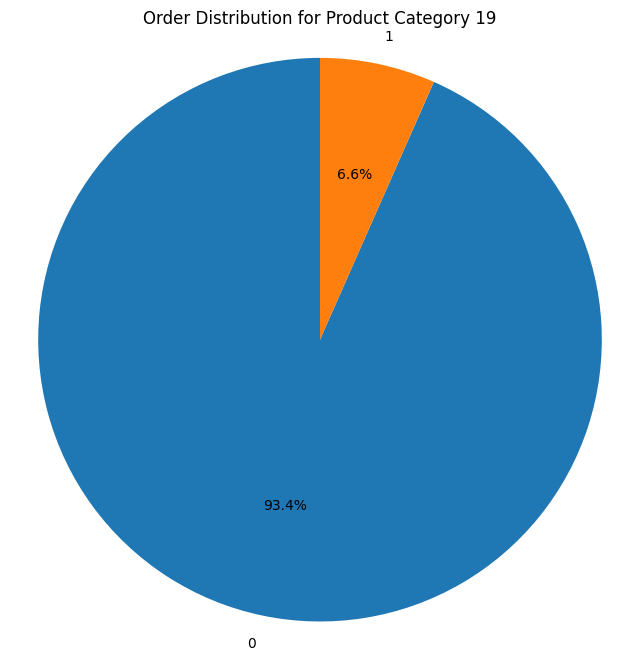

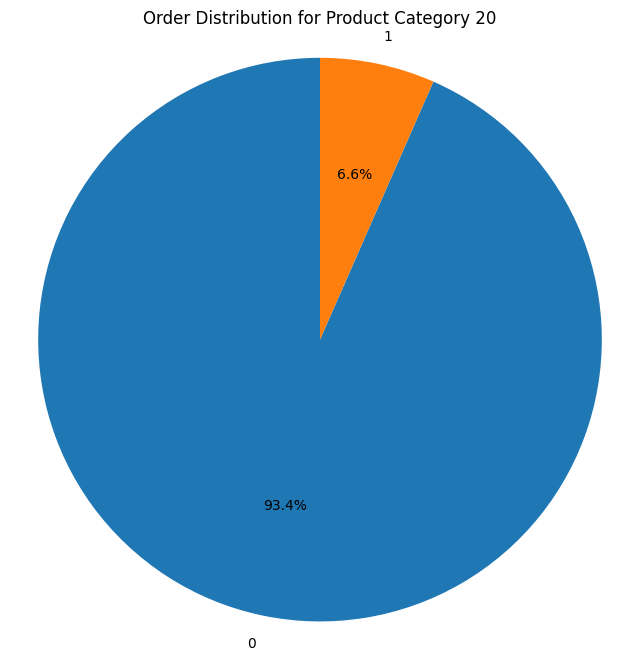

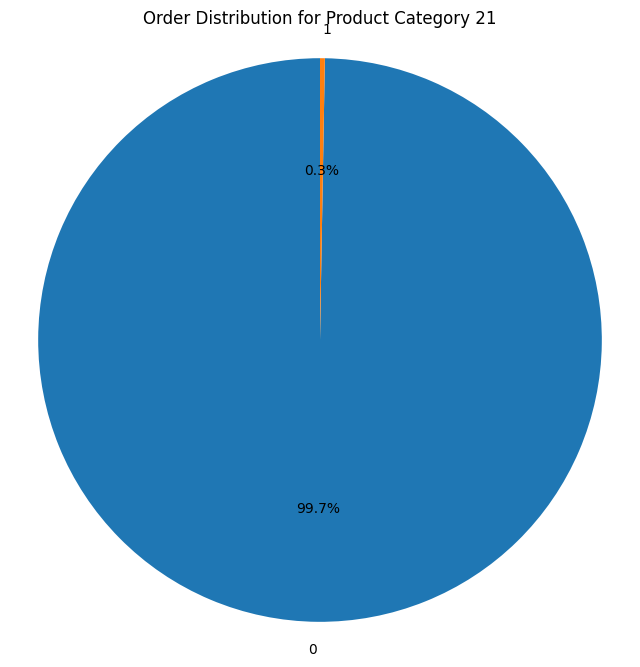

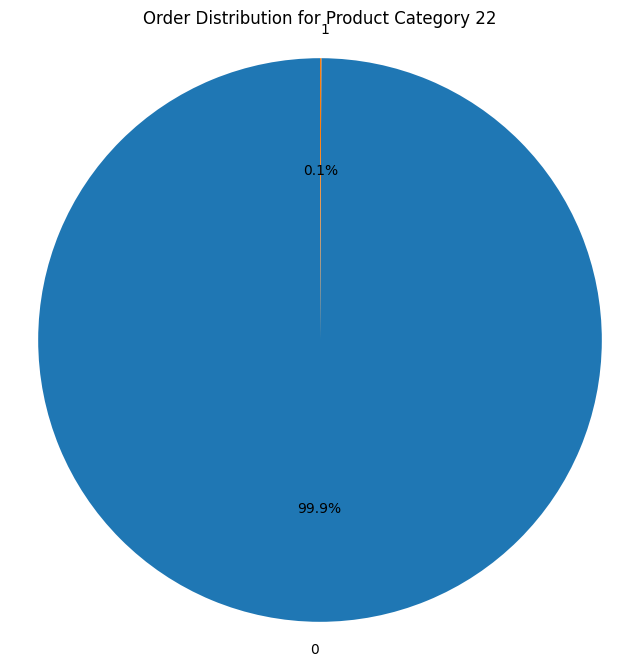

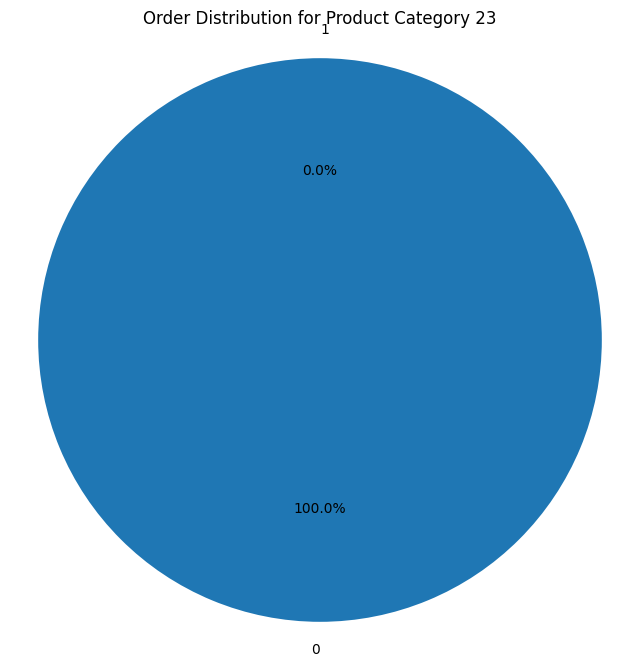

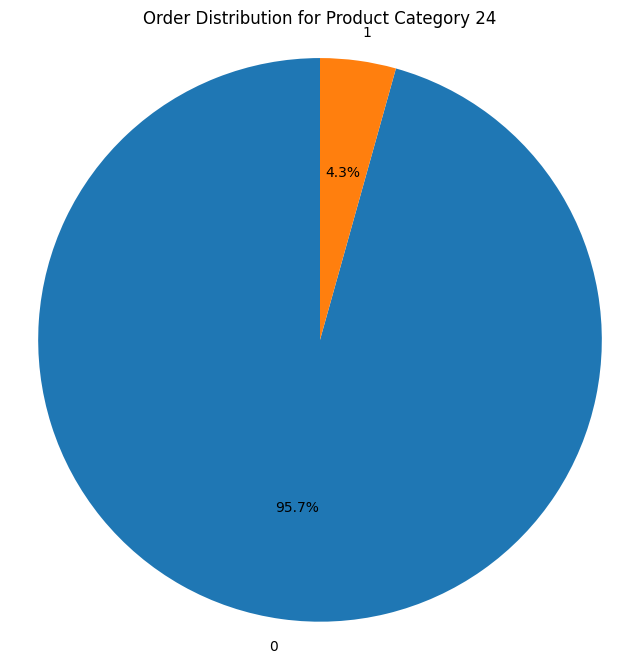

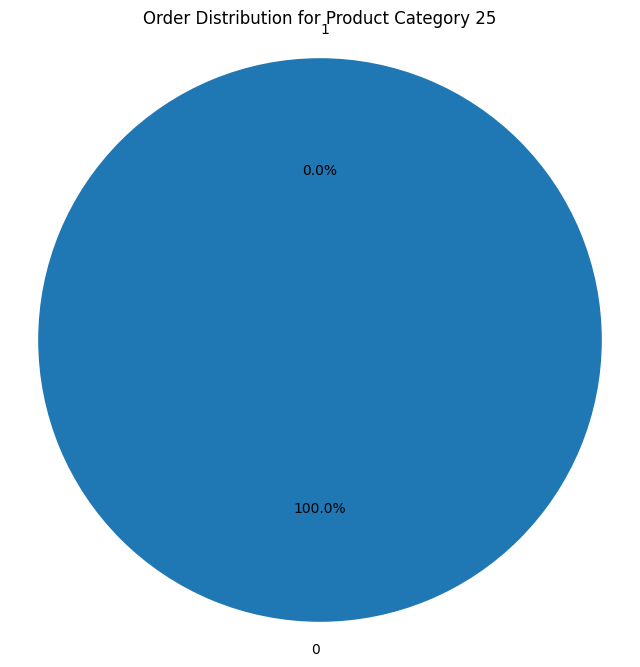

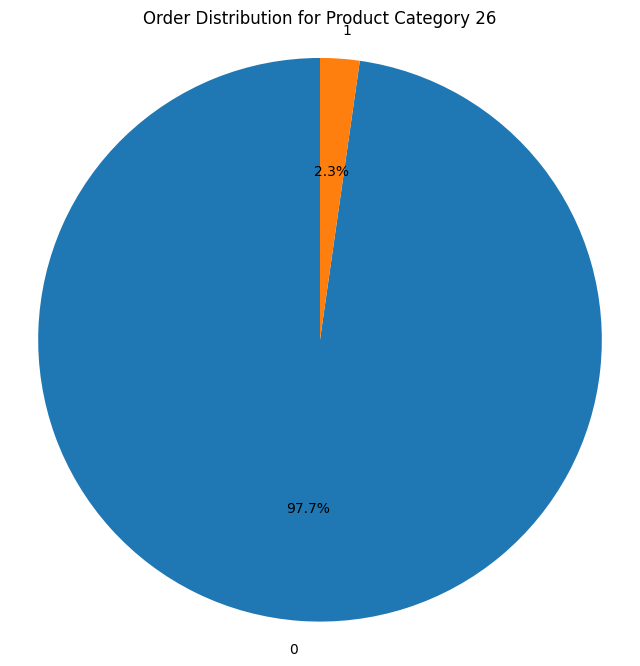

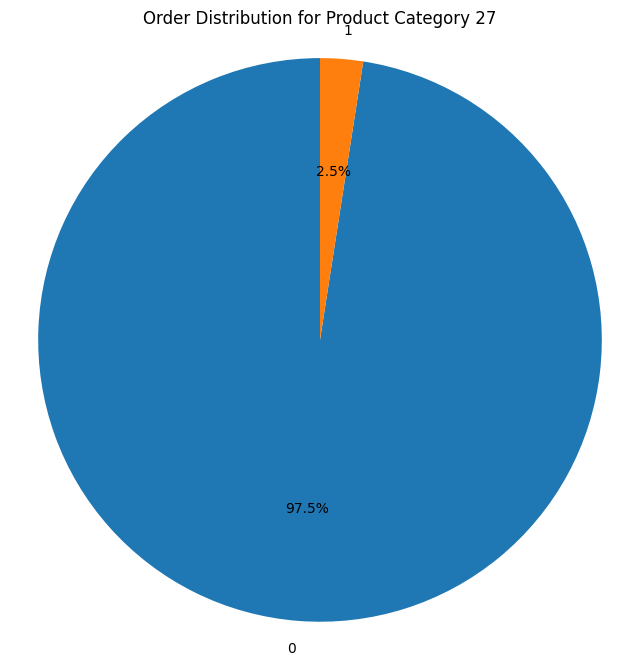

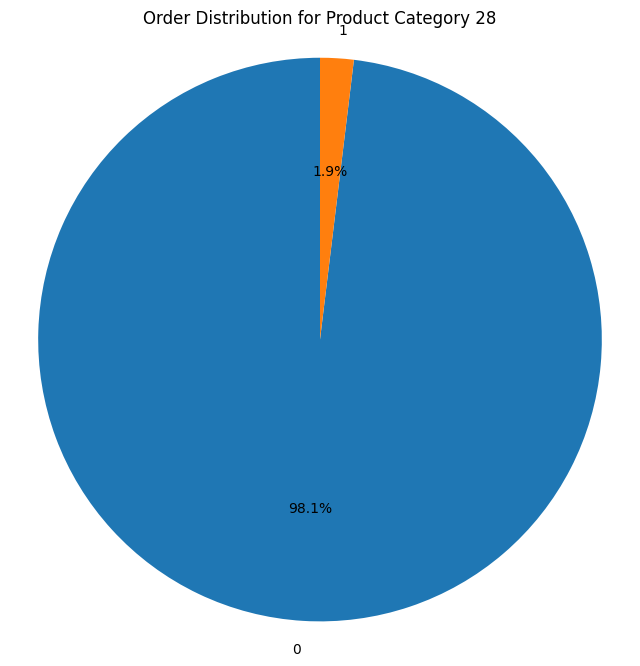

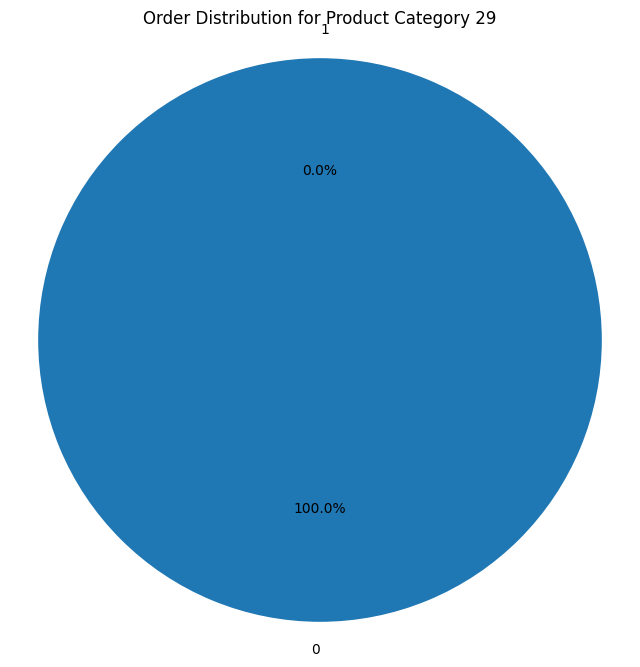

In [ ]:
order_counts = df2.groupby(['Product_Category', 'Day_Type'])['Order_Demand'].sum().unstack(fill_value=0)
for category in order_counts.index:
    plt.figure(figsize=(8, 8))
    plt.pie(order_counts.loc[category], labels=order_counts.columns, autopct='%1.1f%%', startangle=90)
    plt.title(f'Order Distribution for Product Category {category}')
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
    plt.show()

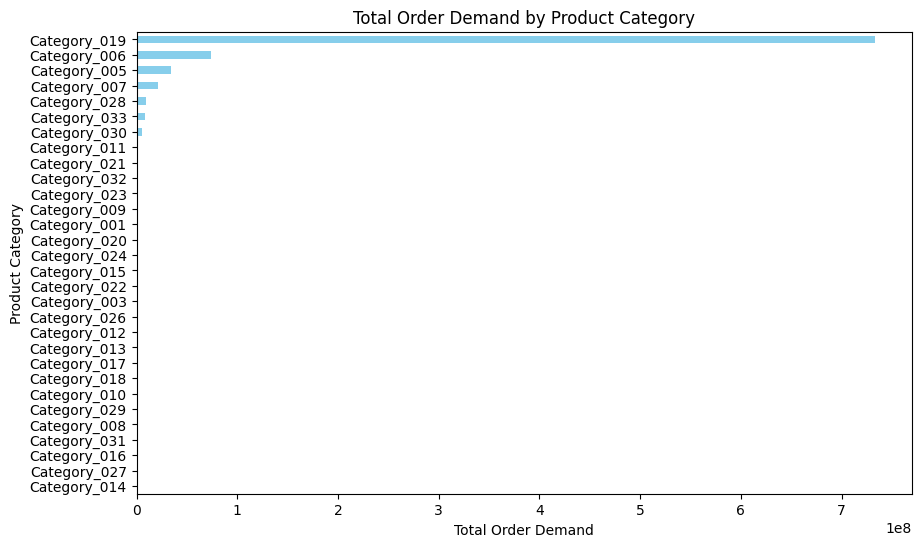

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
order_demand_by_category=df.groupby('Product_Category')['Order_Demand'].sum().sort_values()
order_demand_by_category.plot(kind='barh', color='skyblue')
plt.title('Total Order Demand by Product Category')
plt.xlabel('Total Order Demand')
plt.ylabel('Product Category')
plt.show()


In [ ]:
print(order_demand_by_category)

Product_Category
Category_014           10
Category_027           30
Category_016         1562
Category_031         2038
Category_008         2829
Category_029         3927
Category_010         4228
Category_018         6654
Category_017         8820
Category_013        23798
Category_012        24044
Category_026        40451
Category_003        42219
Category_022        55171
Category_015       139168
Category_024       146016
Category_020       227955
Category_001       349315
Category_009       419392
Category_023       451479
Category_032       603762
Category_021       629120
Category_011       747905
Category_030      5869505
Category_033      8160000
Category_028      8991166
Category_007     21010452
Category_005     33778350
Category_006     73520971
Category_019    732778995
Name: Order_Demand, dtype: int64


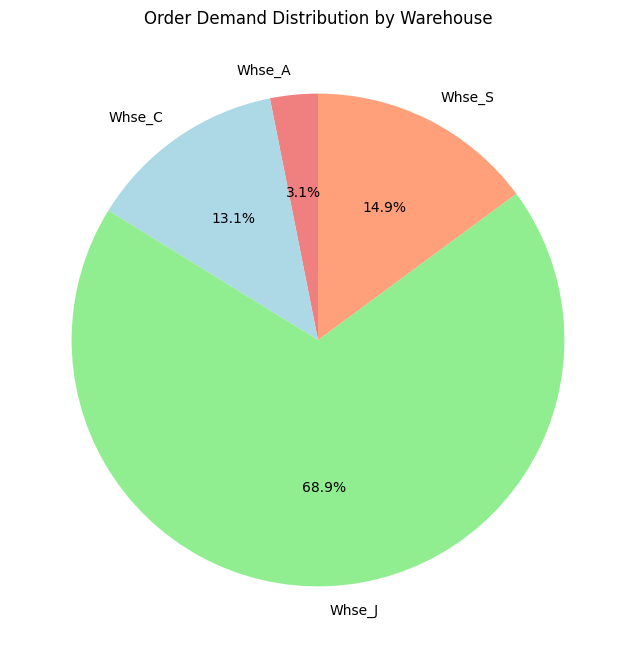

In [ ]:
# Order Demand Distribution by Warehouse

plt.figure(figsize=(8, 8))
df.groupby('Warehouse')['Order_Demand'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon'])
plt.title('Order Demand Distribution by Warehouse')
plt.ylabel('')
plt.show()


<ipython-input-100-2f38d5b9cf6e>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




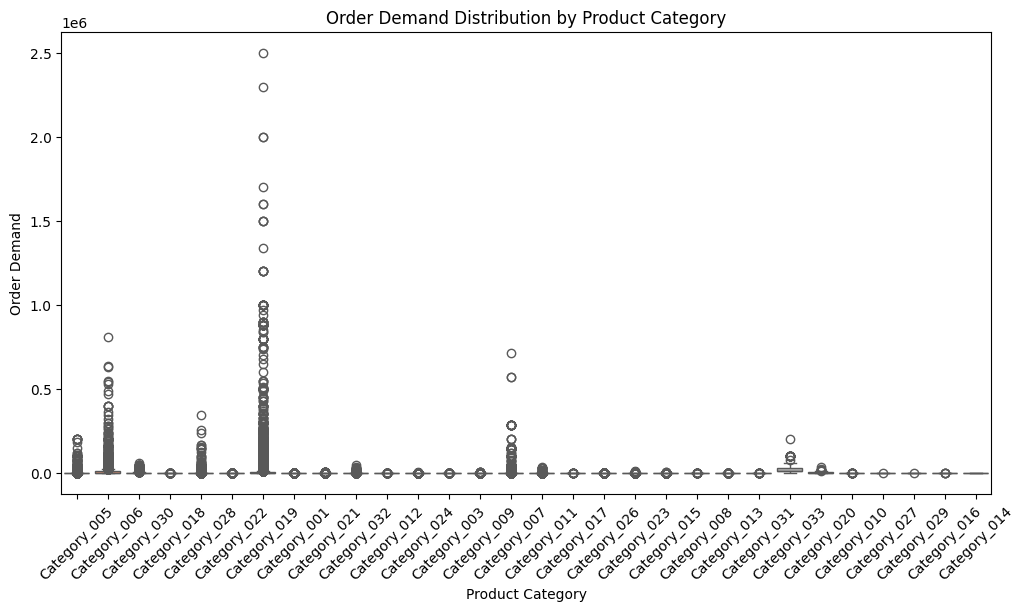

In [ ]:
# Order Demand Distribution by Product Category
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Category', y='Order_Demand', data=df, palette='Set2')
plt.title('Order Demand Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Order Demand')
plt.xticks(rotation=45)
plt.show()


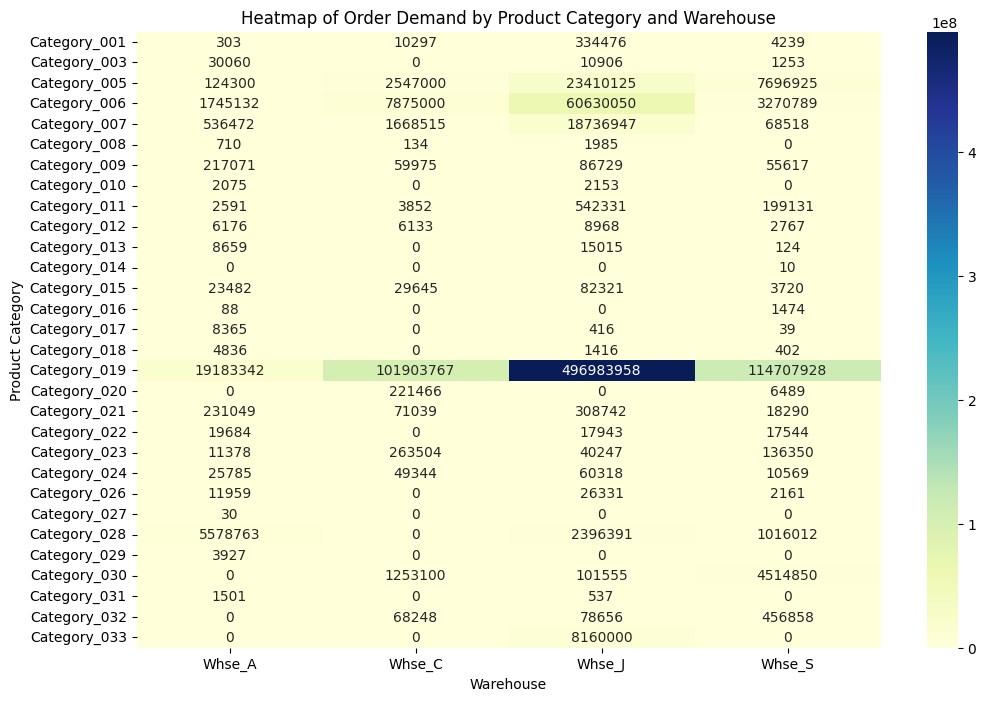

In [ ]:
# Order Demand by Product Category and Warehouse
pivot_table = df.pivot_table(values='Order_Demand', index='Product_Category', columns='Warehouse', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Order Demand by Product Category and Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Product Category')
plt.show()


In [ ]:
import plotly.express as px

In [ ]:
# Order Demand Over Time
df['Date'] = pd.to_datetime(df['Date'])
fig = px.line(df.groupby('Date')['Order_Demand'].sum().reset_index(),
              x='Date',
              y='Order_Demand',
              title='Total Order Demand Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Total Order Demand')
fig.show()


In [ ]:
# Orders by Day Type
fig = px.histogram(df2,
                   x='Day_Type',
                   title='Count of Orders by Day Type',
                   color='Day_Type')
fig.update_layout(xaxis_title='Day Type', yaxis_title='Count of Orders')
fig.show()
